In [1]:
!pip install geopandaS

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_excel('/content/drive/MyDrive/Datasets/charging-stations (1).xlsx')
df.head()

,State Name,No.of Operational Public Charging Stations
0,Andaman & Nicobar,3
1,Andhra Pradesh,222
2,Arunachal Pradesh,9
3,Assam,48
4,Bihar,83


In [8]:
df.describe()

,No.of Operational Public Charging Stations
count,34.000000
mean,193.705882
std,344.290534
min,1.000000
25%,16.500000
50%,54.000000
75%,215.250000
max,1845.000000


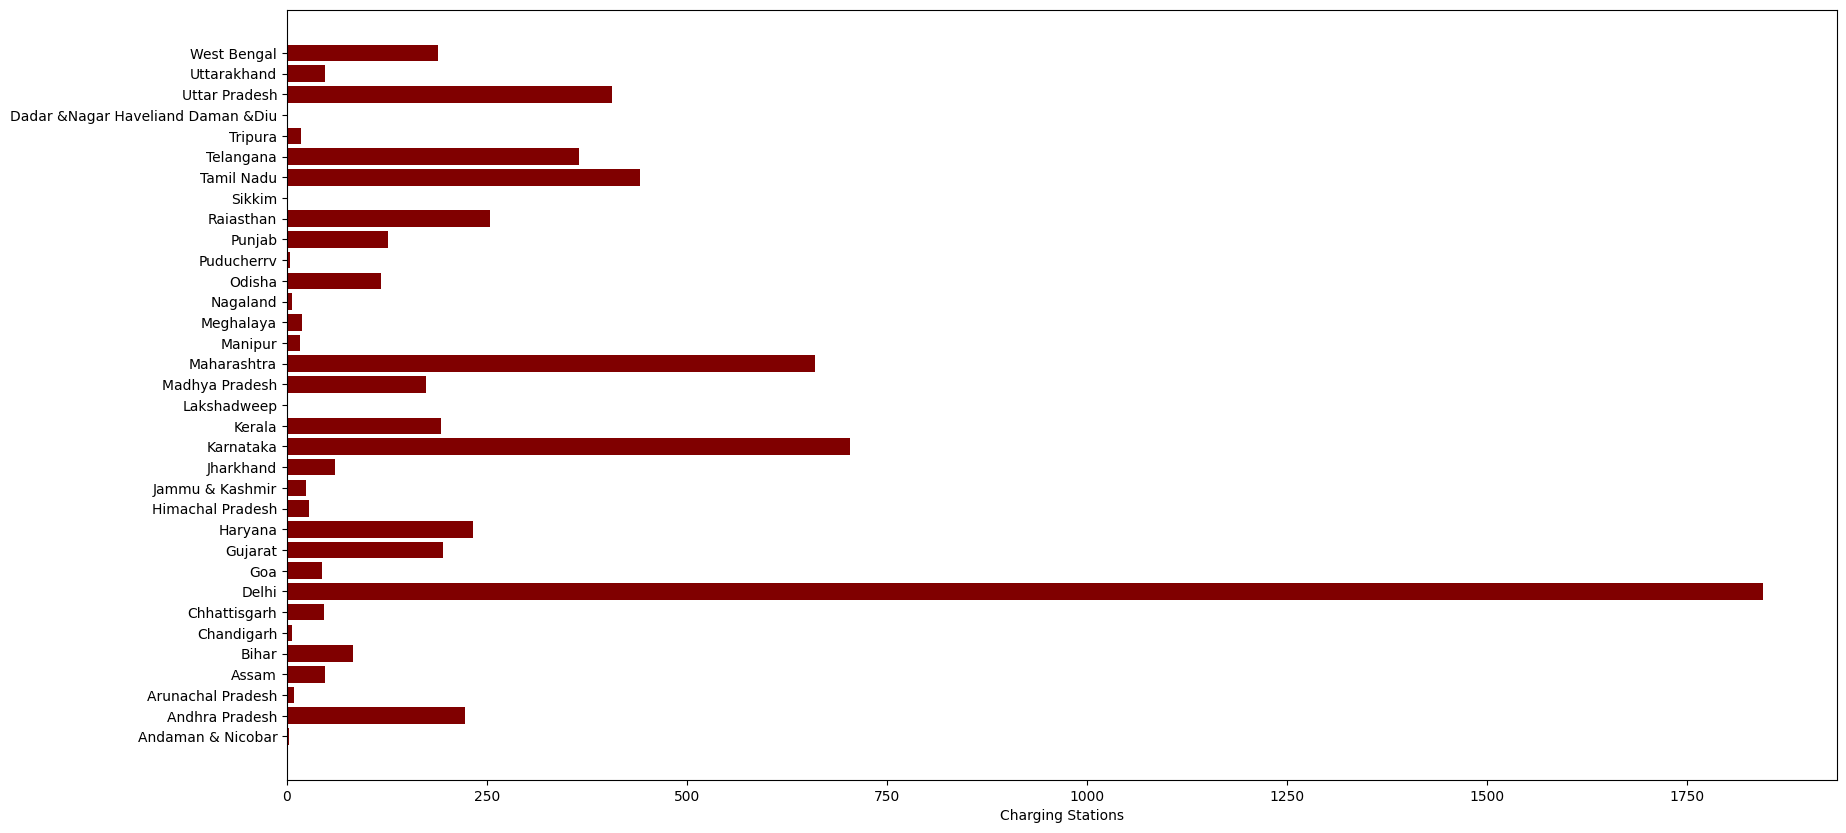

In [4]:
x = list(df["State Name"])
y = list(df['No.of Operational Public Charging Stations'])
  
fig = plt.figure(figsize = (20, 10))

plt.barh(x, y, color ='maroon')

plt.xlabel("Charging Stations")
plt.show()

In [6]:
df['State Name'] = df['State Name'].replace(['Jammu & Kashmir', 'Raiasthan', 'Andaman & Nicobar'], ['Jammu and Kashmir', 'Rajasthan', 'Andaman and Nicobar'])

<Axes: title={'center': 'Number of Charging Stations'}>

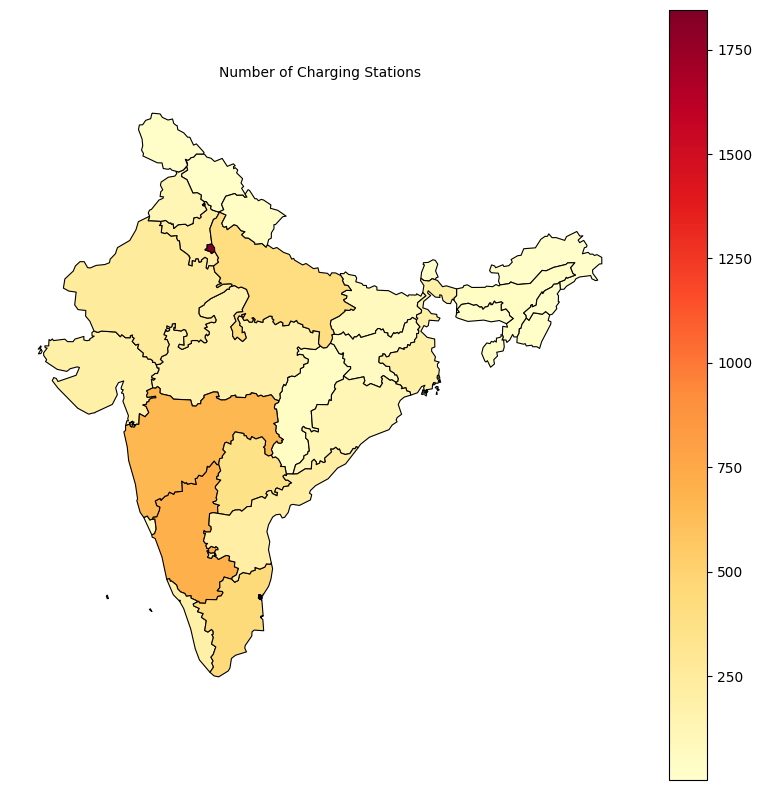

In [7]:
india_shapefile = r"/content/drive/MyDrive/Datasets/data (1)/india-polygon.shp"
map_df = gpd.read_file(india_shapefile)

merged2 = map_df.set_index('st_nm').join(df.set_index('State Name'))

fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Number of Charging Stations', fontdict={'fontsize': '10', 'fontweight' : '10'})

merged2.plot(column='No.of Operational Public Charging Stations',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])